In [ ]:
import sys
sys.path.append('C:/Users/Billy/Documents/PRISMO/Backtester')
from multiprocessing import Process
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import random
from mathCode.johansenMain import coint_johansen
from tqdm import tqdm_notebook
from IPython.display import clear_output
import itertools
import datetime
import os
from base_model_backtest import backtest
import random
# from pandas_datareader import data as pdr
import logging
from pandas.plotting import register_matplotlib_converters
# from functionSource import *
from operator import itemgetter
import statsmodels.api as sm

register_matplotlib_converters()
formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
plt.style.use(['ggplot'])


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
data = pickle.load(open( "D:/PRISMO/historicalData/Data/asx200nobiasFINAL.pickle", "rb" ) )
data = pickle.load(open('D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle','rb'))
data_ = data.xs('OPEN',axis=1,level=1).dropna()
stocks = data_.columns

In [ ]:
data_close.head()

In [ ]:
data = pickle.load(open( "D:/PRISMO/historicalData/Data/asx200nobiasFINAL.pickle", "rb" ) )
data = pickle.load(open('D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle','rb'))
data_ = data.xs('OPEN',axis=1,level=1).dropna()
stocks = data_.columns
#Concatenate open and close prices
data_open = data.xs('OPEN',axis=1,level=1)
data_open.index = data_open.index+pd.Timedelta(10,'H')
data_close = data.xs('CLOSE',axis=1,level=1)
data_close.index = data_open.index+pd.Timedelta(16,'H')
openAndClose = pd.concat([data_open,data_close]).sort_index()
stocks = openAndClose.columns

In [250]:
'CCX.AX' in openAndClose.columns

True

In [254]:
M_ = 10
portfolio_size= 2
res = []
for pair in itertools.permutations(stocks, portfolio_size):
    for M in range(3,M_+1):
        print(pair)
        try: 
            reversed_df = openAndClose[list(pair)].dropna().sort_index(ascending=False)
            reversed_df['hedge'] =  -reversed_df[pair[0]]/reversed_df[pair[1]]   #For every 1 pair[0], buy hedge*pair[1]


            for date in reversed_df.index:
                beta = reversed_df.loc[date].hedge

                window = reversed_df.loc[date:date+pd.Timedelta(-(M+1),'D')]
                returns = window[pair[0]]+beta*window[pair[1]]

                startDate = returns.index[-1]
                res.append([startDate, beta])
                if sm.OLS(list(range(len(returns.values))), returns.values).fit().rsquared > 0.95:
                    res.append([window.iloc[-1],pair, beta])
        except Exception as e:
            print(e)

('ORG.AX', 'WOW.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WOW.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WOW.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WOW.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WOW.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WOW.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WOW.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WOW.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WPL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WPL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WPL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WPL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WPL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WPL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WPL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WPL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WBC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WBC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WBC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WBC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WBC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WBC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WBC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WBC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WFANA.AX^H00')
('ORG.AX', 'WFANA.AX^H00')
('ORG.AX', 'WFANA.AX^H00')
('ORG.AX', 'WFANA.AX^H00')
('ORG.AX', 'WFANA.AX^H00')
('ORG.AX', 'WFANA.AX^H00')
('ORG.AX', 'WFANA.AX^H00')
('ORG.AX', 'WFANA.AX^H00')
('ORG.AX', 'WFA.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WFA.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WFA.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WFA.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WFA.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WFA.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WFA.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WFA.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'ART.AX^H03')
('ORG.AX', 'ART.AX^H03')
('ORG.AX', 'ART.AX^H03')
('ORG.AX', 'ART.AX^H03')
('ORG.AX', 'ART.AX^H03')
('ORG.AX', 'ART.AX^H03')
('ORG.AX', 'ART.AX^H03')
('ORG.AX', 'ART.A

c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WES.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WES.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WES.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WES.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WES.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WES.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WES.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VRLPA.AX^L10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VRLPA.AX^L10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VRLPA.AX^L10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VRLPA.AX^L10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VRLPA.AX^L10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VRLPA.AX^L10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRLPA.AX^L10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRLPA.AX^L10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VRL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VRL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'VID.AX^G09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VID.AX^G09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VID.AX^G09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VID.AX^G09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VID.AX^G09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VID.AX^G09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VID.AX^G09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'VID.AX^G09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WYL.AX^I10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'WYL.AX^I10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WYL.AX^I10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WYL.AX^I10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WYL.AX^I10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WYL.AX^I10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WYL.AX^I10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'WYL.AX^I10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'UXC.AX^B16')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'UXC.AX^B16')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'UXC.AX^B16')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'UXC.AX^B16')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'UXC.AX^B16')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'UXC.AX^B16')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'UXC.AX^B16')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'UXC.AX^B16')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'UEL.AX^G03')
('ORG.AX', 'UEL.AX^G03')
('ORG.AX', 'UEL.AX^G03')
('ORG.AX', 'UEL.AX^G03')
('ORG.AX', 'UEL.AX^G03')
('ORG.AX', 'UEL.AX^G03')
('ORG.AX', 'UEL.AX^G03')
('ORG.AX', 'UEL.AX^G03')
('ORG.AX', 'UTB.AX^K06')
('ORG.AX', 'UTB.AX^K06')
('ORG.AX', 'UTB.AX^K06')
('ORG.AX', 'UTB.AX^K06')
('ORG.AX', 'UTB.AX^K06')
('ORG.AX', 'UTB.AX^K06')
('ORG.AX', 'UTB.AX^K06')
('ORG.AX', 'UTB.AX^K06')
('ORG.AX', 'TCL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TCL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TCL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TCL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TCL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TCL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TCL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TCL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TOL.AX^E15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TOL.AX^E15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TOL.AX^E15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TOL.AX^E15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TOL.AX^E15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TOL.AX^E15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TOL.AX^E15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TOL.AX^E15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TIM.AX^H11')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TIM.AX^H11')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TIM.AX^H11')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TIM.AX^H11')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TIM.AX^H11')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TIM.AX^H11')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TIM.AX^H11')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TIM.AX^H11')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'THG.AX^J12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'THG.AX^J12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'THG.AX^J12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'THG.AX^J12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'THG.AX^J12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'THG.AX^J12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'THG.AX^J12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'THG.AX^J12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TEN.AX^K17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TEN.AX^K17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TEN.AX^K17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TEN.AX^K17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TEN.AX^K17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TEN.AX^K17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TEN.AX^K17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TEN.AX^K17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TLS.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TLS.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TLS.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TLS.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TLS.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TLS.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TLS.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TLS.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TAH.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TAH.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TAH.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'TAH.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TAH.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TAH.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TAH.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TAH.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'TAB.AX^H04')
('ORG.AX', 'TAB.AX^H04')
('ORG.AX', 'TAB.AX^H04')
('ORG.AX', 'TAB.AX^H04')
('ORG.AX', 'TAB.AX^H04')
('ORG.AX', 'TAB.AX^H04')
('ORG.AX', 'TAB.AX^H04')
('ORG.AX', 'TAB.AX^H04')
('ORG.AX', 'SYB.AX^E08')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SYB.AX^E08')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SYB.AX^E08')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SYB.AX^E08')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SYB.AX^E08')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SYB.AX^E08')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SYB.AX^E08')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SYB.AX^E08')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SUNDC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SUNDC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SUNDC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SUNDC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SUNDC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SUNDC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SUNDC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SUNDC.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGP.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGP.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGP.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGP.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGP.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGP.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGP.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGP.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'JUP.AX^L03')
('ORG.AX', 'JUP.AX^L03')
('ORG.AX', 'JUP.AX^L03')
('ORG.AX', 'JUP.AX^L03')
('ORG.AX', 'JUP.AX^L03')
('ORG.AX', 'JUP.AX^L03')
('ORG.AX', 'JUP.AX^L03')
('ORG.AX', 'JUP.AX^L03')
('ORG.AX', 'SGB.AX^D09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGB.AX^D09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGB.AX^D09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGB.AX^D09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGB.AX^D09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGB.AX^D09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGB.AX^D09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGB.AX^D09')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SSX.AX^H07')
('ORG.AX', 'SSX.AX^H07')
('ORG.AX', 'SSX.AX^H07')
('ORG.AX', 'SSX.AX^H07')
('ORG.AX', 'SSX.AX^H07')
('ORG.AX', 'SSX.AX^H07')
('ORG.AX', 'SSX.AX^H07')
('ORG.AX', 'SSX.AX^H07')
('ORG.AX', 'SPT.AX^H12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SPT.AX^H12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SPT.AX^H12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SPT.AX^H12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SPT.AX^H12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SPT.AX^H12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SPT.AX^H12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SPT.AX^H12')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SCP.AX^B01')
('ORG.AX', 'SCP.AX^B01')
('ORG.AX', 'SCP.AX^B01')
('ORG.AX', 'SCP.AX^B01')
('ORG.AX', 'SCP.AX^B01')
('ORG.AX', 'SCP.AX^B01')
('ORG.AX', 'SCP.AX^B01')
('ORG.AX', 'SCP.AX^B01')
('ORG.AX', 'SRP.AX^F05')
('ORG.AX', 'SRP.AX^F05')
('ORG.AX', 'SRP.AX^F05')
('ORG.AX', 'SRP.AX^F05')
('ORG.AX', 'SRP.AX^F05')
('ORG.AX', 'SRP.AX^F05')
('ORG.AX', 'SRP.AX^F05')
('ORG.AX', 'SRP.AX^F05')
('ORG.AX', 'SGW.AX^H06')
('ORG.AX', 'SGW.AX^H06')
('ORG.AX', 'SGW.AX^H06')
('ORG.AX', 'SGW.AX^H06')
('ORG.AX', 'SGW.AX^H06')
('ORG.AX', 'SGW.AX^H06')
('ORG.AX', 'SGW.AX^H06')
('ORG.AX', 'SGW.AX^H06')
('ORG.AX', 'SHL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SHL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SHL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SHL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SHL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SHL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SHL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SHL.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SOH.AX^H04')
('ORG.AX', 'SOH.AX^H04')
('ORG.AX', 'SOH.AX^H04')
('ORG.AX', 'SOH.AX^H04')
('ORG.AX', 'SOH.AX^H04')
('ORG.AX', 'SOH.AX^H04')
('ORG.AX', 'SOH.AX^H04')
('ORG.AX', 'SOH.AX^H04')
('ORG.AX', 'SMX.AX^I17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SMX.AX^I17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SMX.AX^I17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SMX.AX^I17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SMX.AX^I17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SMX.AX^I17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SMX.AX^I17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SMX.AX^I17')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SKE.AX^J15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SKE.AX^J15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SKE.AX^J15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SKE.AX^J15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SKE.AX^J15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SKE.AX^J15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SKE.AX^J15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SKE.AX^J15')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SGM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SGM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SWS.AX^G02')
('ORG.AX', 'SWS.AX^G02')
('ORG.AX', 'SWS.AX^G02')
('ORG.AX', 'SWS.AX^G02')
('ORG.AX', 'SWS.AX^G02')
('ORG.AX', 'SWS.AX^G02')
('ORG.AX', 'SWS.AX^G02')
('ORG.AX', 'SWS.AX^G02')
('ORG.AX', 'SLX.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SLX.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SLX.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SLX.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SLX.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SLX.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SLX.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SLX.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SID.AX^F00')
('ORG.AX', 'SID.AX^F00')
('ORG.AX', 'SID.AX^F00')
('ORG.AX', 'SID.AX^F00')
('ORG.AX', 'SID.AX^F00')
('ORG.AX', 'SID.AX^F00')
('ORG.AX', 'SID.AX^F00')
('ORG.AX', 'SID.AX^F00')
('ORG.AX', 'SWM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SWM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SWM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SWM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SWM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SWM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SWM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SWM.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'SEV.AX^G10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SEV.AX^G10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SEV.AX^G10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SEV.AX^G10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SEV.AX^G10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SEV.AX^G10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SEV.AX^G10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SEV.AX^G10')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'SNX.AX^I03')
('ORG.AX', 'SNX.AX^I03')
('ORG.AX', 'SNX.AX^I03')
('ORG.AX', 'SNX.AX^I03')
('ORG.AX', 'SNX.AX^I03')
('ORG.AX', 'SNX.AX^I03')
('ORG.AX', 'SNX.AX^I03')
('ORG.AX', 'SNX.AX^I03')
('ORG.AX', 'WSF.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WSF.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WSF.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WSF.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WSF.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WSF.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WSF.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'WSF.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'SCW.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'SCW.AX^F17')
index -1 is out of bounds for axis 0 with size 0
('ORG.AX', 'SCW.AX^F17')
index -1 is out of bounds for axis 

c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


('ORG.AX', 'STO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'STO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'STO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'STO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'STO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'STO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'STO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'OTT.AX^F06')
('ORG.AX', 'OTT.AX^F06')
('ORG.AX', 'OTT.AX^F06')
('ORG.AX', 'OTT.AX^F06')
('ORG.AX', 'OTT.AX^F06')
('ORG.AX', 'OTT.AX^F06')
('ORG.AX', 'OTT.AX^F06')
('ORG.AX', 'OTT.AX^F06')
('ORG.AX', 'CMC.AX^F00')
('ORG.AX', 'CMC.AX^F00')
('ORG.AX', 'CMC.AX^F00')
('ORG.AX', 'CMC.AX^F00')
('ORG.AX', 'CMC.AX^F00')
('ORG.AX', 'CMC.AX^F00')
('ORG.AX', 'CMC.AX^F00')
('ORG.AX', 'CMC.AX^F00')
('ORG.AX', 'RIO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'RIO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'RIO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'RIO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'RIO.AX')


c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


('ORG.AX', 'RIO.AX')


KeyboardInterrupt: 

In [256]:
res[0]

[Timestamp('2019-10-05 02:00:00'), -0.2134376686454398]

In [179]:
data_close.sort_index(ascending=False)

,ORG.AX,WOW.AX,WPL.AX,WBC.AX,WFANA.AX^H00,WFA.AX^F17,ART.AX^H03,WES.AX,VRLPA.AX^L10,VRL.AX,...,NEA.AX,COE.AX,SSM.AX,CUV.AX,PME.AX,PNV.AX,NWL.AX,JIN.AX,GOR.AX,CKF.AX
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-08,7.91,37.06,31.38,28.68,NaN,NaN,NaN,39.40,NaN,2.83,...,2.48,0.555,2.52,28.09,29.64,2.21,8.88,26.07,1.165,10.44
2019-10-07,7.79,36.81,31.15,28.61,NaN,NaN,NaN,38.97,NaN,2.84,...,2.51,0.565,2.55,27.10,30.33,2.24,8.69,26.93,1.205,9.94
2019-10-04,7.74,36.32,30.85,28.42,NaN,NaN,NaN,38.67,NaN,2.88,...,2.46,0.560,2.59,26.02,29.36,2.17,8.76,26.90,1.205,9.94
2019-10-03,7.70,36.29,30.77,28.50,NaN,NaN,NaN,38.75,NaN,2.80,...,2.42,0.535,2.58,24.69,28.81,2.11,8.53,25.36,1.215,9.94
2019-10-02,7.93,37.09,31.74,29.21,NaN,NaN,NaN,39.42,NaN,2.87,...,2.56,0.555,2.66,25.61,28.94,2.19,8.73,25.14,1.200,9.95
2019-10-01,7.96,37.59,32.20,29.70,NaN,NaN,NaN,40.19,NaN,2.80,...,2.66,0.575,2.70,24.79,29.33,2.22,8.76,25.70,1.220,10.10
2019-09-30,7.97,37.28,32.38,29.64,NaN,NaN,NaN,39.80,NaN,2.84,...,2.58,0.580,2.62,24.70,27.82,2.14,9.11,24.19,1.245,10.01
2019-09-27,8.01,37.54,32.03,29.90,NaN,NaN,NaN,40.35,NaN,2.83,...,2.61,0.575,2.60,24.88,28.00,2.15,9.38,24.43,1.270,10.12
2019-09-26,7.81,37.38,31.72,29.86,NaN,NaN,NaN,39.77,NaN,2.80,...,2.56,0.570,2.59,25.52,28.63,2.19,9.33,24.09,1.295,10.14


In [29]:
np.linalg.solve(reversed_df.values[0].T,0)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [32]:
np.array([[0]]*2)

array([[0],
       [0]])

In [36]:
reversed_df.values[0]

array([ 7.91, 37.06])

In [35]:
np.linalg.solve(np.array([[1]]*2),np.array([0]))

LinAlgError: Last 2 dimensions of the array must be square

In [41]:
a = np.array([[7.91], [7.91]])
b = np.array([0])
x = np.linalg.solve(a, b)


In [42]:
x

array([0., 0.])

In [43]:
np.cross(np.array([[7.91], [7.91]]),np.array([[0], [0]]))

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [44]:
from scipy.optimize import linprog

In [94]:
c = list(reversed_df.values[0])

[7.91, 37.06]

In [113]:
c = np.array([37.06, 7.91])

In [114]:
# c = reversed_df.values[0]
A = [[1,1],-c]
B = [1,0]


In [115]:
res = linprog(c, A,B,bounds = [(1,None),(None,-0.1)])

In [116]:
res

     con: array([], dtype=float64)
     fun: 0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([4.6852086, 0.       ])
  status: 0
 success: True
       x: array([ 1.       , -4.6852086])

In [89]:
from scipy.optimize import minimize, rosen, rosen_der


In [90]:
rosen

<function scipy.optimize.optimize.rosen(x)>

In [154]:
def find


def findHedge(x):
    index = 0
    x_ = list(x)
    x = [x_[index]] + x_[:index]+x_[index+1:]
    A = [[1]*len(x),-np.array(x)]
    B = [1,-1]
    res = linprog(x, A,B,bounds = [(0.1,None),(None,-0.1),(None,0.000001)])
    print(res)

In [155]:
findHedge(np.array([7,21,5]))

     con: array([], dtype=float64)
     fun: 0.9999999999999984
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.00000000e+00, -1.55431223e-15])
  status: 0
 success: True
       x: array([ 1.42857029e+00, -4.28571286e-01,  1.00000000e-06])


In [167]:
linprog([7,21,5], [[1,1,1],-np.array([7,21,5])],[1,-0.1],bounds = [(1,None),(None,-0.1),(None,-0.01)])

     con: array([], dtype=float64)
     fun: 0.09999999999999858
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 3.36190476e-01, -1.42941214e-15])
  status: 0
 success: True
       x: array([ 1.        , -0.32619048, -0.01      ])

In [7]:
temp = data_close[['TLS.AX','SKC.AX']].dropna()
train_ratio = 0.8
test_ratio = 0.11

train_data = temp.iloc[:int(train_ratio*len(temp))]
test_data = temp.iloc[int((train_ratio)*len(temp)):int((test_ratio+train_ratio)*len(temp))]

In [8]:
test_data

,TLS.AX,SKC.AX
Date,,
2017-07-04 02:00:00,4.146352,3.85
2017-07-05 02:00:00,4.232935,3.89
2017-07-06 02:00:00,4.242555,3.91
2017-07-07 02:00:00,4.204074,3.96
2017-07-08 02:00:00,4.155972,3.94
2017-07-11 02:00:00,4.194453,3.96
2017-07-12 02:00:00,4.175213,3.96
2017-07-13 02:00:00,4.155972,3.94
2017-07-14 02:00:00,4.146352,3.93


In [9]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": train_data[stock].index[0], "target": train_data[stock]} for stock in temp.columns],
    freq = "1d"
)
from gluonts.model.deep_factor  import DeepFactorEstimator
from gluonts.model.deepstate import DeepStateEstimator

In [58]:
df_all = pd.DataFrame()

In [59]:
df_all['r1'] =df['returns']
df_all['r2'] =df['returns'].iloc[-2:]

In [60]:
df_all

,r1,r2
2018-05-10 02:00:00,NaN,NaN
2018-05-11 02:00:00,-0.050000,NaN
2018-05-12 02:00:00,-0.055921,NaN
2018-05-13 02:00:00,-0.003484,NaN
2018-05-14 02:00:00,0.003497,NaN
2018-05-15 02:00:00,-0.006969,NaN
2018-05-16 02:00:00,-0.017544,NaN
2018-05-17 02:00:00,-0.021429,NaN
2018-05-18 02:00:00,0.014599,NaN
2018-05-19 02:00:00,0.003597,NaN


## DEEP AR SAMPLE UNIVARIATE

In [5]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

#Read Data
data = pickle.load(open( "D:/PRISMO/historicalData/Data/asx200nobiasFINAL.pickle", "rb" ) )
data = pickle.load(open('D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle','rb'))
data_ = data.xs('OPEN',axis=1,level=1).dropna()
stocks = data_.columns
#Concatenate open and close prices
data_open = data.xs('OPEN',axis=1,level=1)
data_open.index = data_open.index+pd.Timedelta(10,'H')
data_close = data.xs('CLOSE',axis=1,level=1)
data_close.index = data_open.index+pd.Timedelta(16,'H')
openAndClose = pd.concat([data_open,data_close]).sort_index()
stocks = openAndClose.columns






INFO:root:Using CPU


In [6]:
pred_len = 2

temp = data_close[['TLS.AX',]].dropna()
train_ratio = 0.88

train_data = temp.iloc[:int(train_ratio*len(temp))]
test_data = temp.iloc[: int((train_ratio)*len(temp))+pred_len]
target_asset = temp.columns[0]

#Create univariate dataset
training_data = ListDataset(
    [{"start": train_data[target_asset].index[0],
      "target": train_data[target_asset]}],
    freq = "1d"
)

# Create testing datatset
testing_data = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": train_data[target_asset]}],
    freq = "1d"
)

# Create testing datatset
testing_data_plots = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": test_data[target_asset]}],
    freq = "1d"
)


In [7]:
#Create the estimator and train
estimator = DeepAREstimator(freq="1d", prediction_length=pred_len, trainer=Trainer(epochs=100))
predictor = estimator.train(training_data=training_data)


INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|█████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.19it/s, avg_epoch_loss=1.25]
INFO:root:Epoch[0] Elapsed time 1.842 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=1.245467
INFO:root:Epoch[1] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.98it/s, avg_epoch_loss=-.427]
INFO:root:Epoch[1] Elapsed time 1.671 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-0.426661
INFO:root:Epoch[2] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.77it/s, avg_epoch_loss=-.596]
INFO:root:Epoch[2] Elapsed time 1.683 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-0.595569
INFO:root:Epoch[3] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.52it/s, avg_ep

100%|█████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.15it/s, avg_epoch_loss=-1.7]
INFO:root:Epoch[29] Elapsed time 1.720 seconds
INFO:root:Epoch[29] Evaluation metric 'epoch_loss'=-1.701481
INFO:root:Epoch[30] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.91it/s, avg_epoch_loss=-1.68]
INFO:root:Epoch[30] Elapsed time 1.734 seconds
INFO:root:Epoch[30] Evaluation metric 'epoch_loss'=-1.677819
INFO:root:Epoch[31] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.47it/s, avg_epoch_loss=-1.65]
INFO:root:Epoch[31] Elapsed time 1.645 seconds
INFO:root:Epoch[31] Evaluation metric 'epoch_loss'=-1.653156
INFO:root:Epoch[32] Learning rate is 0.001
100%|█████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.08it/s, avg_epoch_loss=-1.7]
INFO:root:Epoch[32] Elapsed time 1.666 seconds
INFO:root:Epoch[32] 

100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.72it/s, avg_epoch_loss=-1.74]
INFO:root:Epoch[59] Elapsed time 1.632 seconds
INFO:root:Epoch[59] Evaluation metric 'epoch_loss'=-1.739047
INFO:root:Epoch[60] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 26.92it/s, avg_epoch_loss=-1.81]
INFO:root:Epoch[60] Elapsed time 1.865 seconds
INFO:root:Epoch[60] Evaluation metric 'epoch_loss'=-1.806203
INFO:root:Epoch[61] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.60it/s, avg_epoch_loss=-1.83]
INFO:root:Epoch[61] Elapsed time 1.815 seconds
INFO:root:Epoch[61] Evaluation metric 'epoch_loss'=-1.826914
INFO:root:Epoch[62] Learning rate is 0.001
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.52it/s, avg_epoch_loss=-1.83]
INFO:root:Epoch[62] Elapsed time 1.641 seconds
INFO:root:Epoch[62] 

INFO:root:Epoch[88] Evaluation metric 'epoch_loss'=-1.821348
INFO:root:Epoch[89] Learning rate is 0.00025
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.86it/s, avg_epoch_loss=-1.83]
INFO:root:Epoch[89] Elapsed time 1.797 seconds
INFO:root:Epoch[89] Evaluation metric 'epoch_loss'=-1.834946
INFO:root:Epoch[90] Learning rate is 0.00025
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.02it/s, avg_epoch_loss=-1.87]
INFO:root:Epoch[90] Elapsed time 1.789 seconds
INFO:root:Epoch[90] Evaluation metric 'epoch_loss'=-1.872241
INFO:root:Epoch[91] Learning rate is 0.00025
100%|████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.05it/s, avg_epoch_loss=-1.83]
INFO:root:Epoch[91] Elapsed time 1.724 seconds
INFO:root:Epoch[91] Evaluation metric 'epoch_loss'=-1.825093
INFO:root:Epoch[92] Learning rate is 0.00025
100%|████████████████████████████████████████████████████████████| 50/50 [0

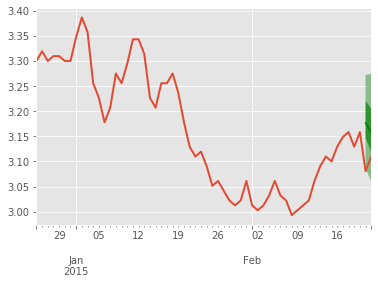

In [329]:
#Forecast
for test_entry, forecast in zip(testing_data_plots, predictor.predict(testing_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])

#Note that the dates are likely gonna be off. The test_entry plots daily from a given start date, instead of the normal weekly prices

In [330]:
from gluonts.evaluation import Evaluator
from gluonts.evaluation.backtest import make_evaluation_predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=testing_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

Sample Strategy

In [39]:
test_data = temp.iloc[:int(train_ratio*len(temp))+pred_len] 
start_date = train_data.index[-1]

df = pd.DataFrame()
date= start_date

for i in range(len(temp.iloc[int(train_ratio*len(temp))+pred_len:])):
    #Compare yesterdays prediction with today's close price
    
    data_temp = temp.iloc[i:int(train_ratio*len(temp))+pred_len+i]
    currentPrice = data_temp[target_asset].iloc[-1]
    
    #If yesterdays predicion in the df, compare the prediction with the current close price
    if date-pd.Timedelta(1,'D') in df.index:
        yesterdayDate = date-pd.Timedelta(1,'D') 
        if currentPrice <= df.loc[(yesterdayDate, 'lowerQ')]:
            df.loc[(date, 'signal') ] =  'BUY'
            print('BUY')
        elif currentPrice >= df.loc[(yesterdayDate, 'upperQ')]:
            df.loc[(date, 'signal') ] =  'SHORT'
            print('SHORT')
        else:
            df.loc[(date, 'signal') ] =  np.nan
    
    
    
    #Compute tomorrows prediction

    # Create testing datatset
    testing_data = ListDataset(
        [{"start": data_temp[target_asset].index[0],
          "target": data_temp[target_asset]}],
        freq = "1d"
    )

    
    prediction = []
    for test_entry, forecast in zip(testing_data, predictor.predict(testing_data)):
#         to_pandas(test_entry)[-20:].plot()
#         forecast.plot()
#         plt.show()
        prediction.append(forecast.quantile(0.1)[0])
        prediction.append(forecast.mean[0])
        prediction.append(forecast.quantile(0.9)[0])
        
    df.loc[(date, 'price') ] =  currentPrice 
    df.loc[(date, 'lowerQ')] = prediction[0]
    df.loc[(date, 'mean')] = prediction[1]
    df.loc[(date, 'upperQ')] = prediction[2]
      
    date += pd.Timedelta(1,'D')
    
    
    
  

BUY
BUY
BUY
BUY
BUY
SHORT
BUY
BUY
BUY
SHORT
SHORT
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
SHORT
SHORT
SHORT
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
SHORT
BUY
BUY
BUY
SHORT
SHORT
BUY
SHORT
SHORT
BUY
BUY
BUY
SHORT
BUY
BUY
SHORT
BUY
SHORT
BUY
BUY
BUY
BUY
BUY
BUY
BUY
SHORT
SHORT
BUY
BUY
BUY
SHORT
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
SHORT
BUY
SHORT
SHORT
SHORT
BUY
BUY
BUY
BUY
BUY
BUY
BUY
SHORT
BUY
SHORT
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
BUY
SHORT
BUY
BUY
BUY
BUY
BUY
SHORT
BUY
BUY
BUY
SHORT
SHORT
BUY
BUY
BUY
BUY
SHORT


In [53]:
df['returns']=df['price'].pct_change()
df['returnsShift1'] = df['returns'].shift(-1)
df['long'] = 0
df['short'] = 0
df['long'][df['signal']=='BUY']=1
df['short'][df['signal']=='SHORT']=1
df['numUnits'] = df['long']-df['short']
df['marketValue'] = df['numUnits']*df['returnsShift1']
plt.plot(np.cumsum(df['marketValue']))

c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\billy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


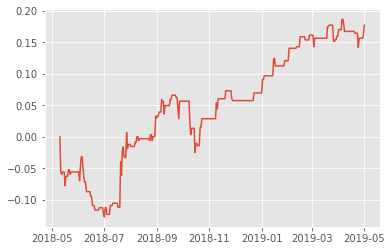

In [55]:
plt.plot(np.cumsum(df['marketValue']))

In [50]:
df

,price,lowerQ,mean,upperQ,signal,returns,returnsShift1,long,short
2018-05-10 02:00:00,3.109685,3.077702,3.122467,3.168359,NaN,NaN,-0.050000,0,0
2018-05-11 02:00:00,2.954201,3.019607,3.052762,3.086892,BUY,-0.050000,-0.055921,1,0
2018-05-12 02:00:00,2.788999,2.854873,2.885682,2.929694,BUY,-0.055921,-0.003484,1,0
2018-05-13 02:00:00,2.779281,2.762909,2.799554,2.832135,BUY,-0.003484,0.003497,1,0
2018-05-14 02:00:00,2.788999,2.763618,2.800965,2.842305,NaN,0.003497,-0.006969,0,0
2018-05-15 02:00:00,2.769563,2.747916,2.790326,2.836598,NaN,-0.006969,-0.017544,0,0
2018-05-16 02:00:00,2.720974,2.733409,2.768977,2.801993,BUY,-0.017544,-0.021429,1,0
2018-05-17 02:00:00,2.662668,2.693493,2.721950,2.751059,BUY,-0.021429,0.014599,1,0
2018-05-18 02:00:00,2.701539,2.677402,2.705948,2.740867,NaN,0.014599,0.003597,0,0
2018-05-19 02:00:00,2.711256,2.694200,2.726175,2.756060,NaN,0.003597,0.028674,0,0


In [331]:
forecasts = list(forecast_it)
tss = list(ts_it)
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(testing_data))


Running evaluation: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 111.43it/s]


In [332]:
agg_metrics

{'MSE': 0.003224199404940009,
 'abs_error': 0.10596871376037598,
 'abs_target_sum': 6.287394046783447,
 'abs_target_mean': 3.1436970233917236,
 'seasonal_error': 0.03717831440572265,
 'MASE': 1.4251414494475416,
 'sMAPE': 0.01672376855636553,
 'MSIS': 4.344551556353693,
 'QuantileLoss[0.1]': 0.012646675109863281,
 'Coverage[0.1]': 0.0,
 'QuantileLoss[0.5]': 0.10596871376037598,
 'Coverage[0.5]': 1.0,
 'QuantileLoss[0.9]': 0.05196256637573241,
 'Coverage[0.9]': 1.0,
 'RMSE': 0.05678203417402382,
 'NRMSE': 0.01806218403094134,
 'ND': 0.01685415499201744,
 'wQuantileLoss[0.1]': 0.002011433515342205,
 'wQuantileLoss[0.5]': 0.01685415499201744,
 'wQuantileLoss[0.9]': 0.008264563345177294,
 'mean_wQuantileLoss': 0.009043383950845647,
 'MAE_Coverage': 0.2333333333333333}

## DEEP STATE SAMPLE UNIVARIATE

In [4]:
from gluonts.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

pred_len = 3


#Read Data
data = pickle.load(open( "D:/PRISMO/historicalData/Data/asx200nobiasFINAL.pickle", "rb" ) )
data = pickle.load(open('D:/PRISMO/historicalData/data/asx200nobiasFINAL.pickle','rb'))
data_ = data.xs('OPEN',axis=1,level=1).dropna()
stocks = data_.columns
#Concatenate open and close prices
data_open = data.xs('OPEN',axis=1,level=1)
data_open.index = data_open.index+pd.Timedelta(10,'H')
data_close = data.xs('CLOSE',axis=1,level=1)
data_close.index = data_open.index+pd.Timedelta(16,'H')
openAndClose = pd.concat([data_open,data_close]).sort_index()
stocks = openAndClose.columns

# temp = data_close[['TLS.AX','SKC.AX','ABP.AX','SPK.AX']].dropna()
temp = data_close[['TLS.AX','SKC.AX']].dropna()
train_ratio = 0.9
test_ratio = 0.11

train_data = temp.iloc[:int(train_ratio*len(temp))]
test_data = temp.iloc[:int(train_ratio*len(temp))+pred_len]



#FUCK THIS API BUT ALSO NOT REALLY ITS REALLY GOOD BUT FFS DOCUMENT THIS THIS BETTER

# target shape: (num_series, ts_length)
# feat_dynamic_real shape: (num_series, num_features, ts_length)
    
    
# The training data will have form (ts_length,), since its univariate

target_asset = temp.columns[0]
feature_assets = temp.columns[1:]
'feat_dynamic_real'

#Create univariate dataset
training_data = ListDataset(
    [{"start": train_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': train_data[feature_assets].values.T}],
    freq = "1d"
)

# Create testing datatset
testing_data = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": train_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1d"
)

# Create testing datatset
testing_data_plots = ListDataset(
    [{"start": test_data[target_asset].index[0],
      "target": test_data[target_asset],
      'feat_dynamic_real': test_data[feature_assets].values.T}],
    freq = "1d"
)

from gluonts.model.deepstate import DeepStateEstimator

#Create the estimator and train
estimator = DeepStateEstimator(freq="1d", prediction_length=pred_len,
                               use_feat_static_cat=False, 
                               use_feat_dynamic_real=True,
                               cardinality=[1],
                               trainer = Trainer(epochs=10))
#                                add_trend = True,
#                                num_periods_to_train = 30)

predictor = estimator.train(training_data=training_data)